# CompMech04-Linear Algebra Project
## Practical Linear Algebra for Finite Element Analysis

In this project we will perform a linear-elastic finite element analysis (FEA) on a support structure made of 11 beams that are riveted in 7 locations to create a truss as shown in the image below. 

![Mesh image of truss](../images/mesh.png)

The triangular truss shown above can be modeled using a [direct stiffness method [1]](https://en.wikipedia.org/wiki/Direct_stiffness_method), that is detailed in the [extra-FEA_material](./extra-FEA_material.ipynb) notebook. The end result of converting this structure to a FE model. Is that each joint, labeled $n~1-7$, short for _node 1-7_ can move in the x- and y-directions, but causes a force modeled with Hooke's law. Each beam labeled $el~1-11$, short for _element 1-11_, contributes to the stiffness of the structure. We have 14 equations where the sum of the components of forces = 0, represented by the equation

$\mathbf{F-Ku}=\mathbf{0}$

Where, $\mathbf{F}$ are externally applied forces, $\mathbf{u}$ are x- and y- displacements of nodes, and $\mathbf{K}$ is the stiffness matrix given in `fea_arrays.npz` as `K`, shown below

_note: the array shown is 1000x(`K`). You can use units of MPa (N/mm^2), N, and mm. The array `K` is in 1/mm_

$\mathbf{K}=EA*$

$  \left[ \begin{array}{cccccccccccccc}
 4.2 & 1.4 & -0.8 & -1.4 & -3.3 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
 1.4 & 2.5 & -1.4 & -2.5 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
 -0.8 & -1.4 & 5.0 & 0.0 & -0.8 & 1.4 & -3.3 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
 -1.4 & -2.5 & 0.0 & 5.0 & 1.4 & -2.5 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
 -3.3 & 0.0 & -0.8 & 1.4 & 8.3 & 0.0 & -0.8 & -1.4 & -3.3 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
 0.0 & 0.0 & 1.4 & -2.5 & 0.0 & 5.0 & -1.4 & -2.5 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
 0.0 & 0.0 & -3.3 & 0.0 & -0.8 & -1.4 & 8.3 & 0.0 & -0.8 & 1.4 & -3.3 & 0.0 & 0.0 & 0.0 \\
 0.0 & 0.0 & 0.0 & 0.0 & -1.4 & -2.5 & 0.0 & 5.0 & 1.4 & -2.5 & 0.0 & 0.0 & 0.0 & 0.0 \\
 0.0 & 0.0 & 0.0 & 0.0 & -3.3 & 0.0 & -0.8 & 1.4 & 8.3 & 0.0 & -0.8 & -1.4 & -3.3 & 0.0 \\
 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 1.4 & -2.5 & 0.0 & 5.0 & -1.4 & -2.5 & 0.0 & 0.0 \\
 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -3.3 & 0.0 & -0.8 & -1.4 & 5.0 & 0.0 & -0.8 & 1.4 \\
 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -1.4 & -2.5 & 0.0 & 5.0 & 1.4 & -2.5 \\
 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -3.3 & 0.0 & -0.8 & 1.4 & 4.2 & -1.4 \\
 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 1.4 & -2.5 & -1.4 & 2.5 \\
\end{array}\right]~\frac{1}{m}$

In [85]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [86]:
fea_arrays = np.load('./fea_arrays.npz')
K=fea_arrays['K']
K

array([[ 0.00416667,  0.00144338, -0.00083333, -0.00144338, -0.00333333,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.00144338,  0.0025    , -0.00144338, -0.0025    ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.00083333, -0.00144338,  0.005     ,  0.        , -0.00083333,
         0.00144338, -0.00333333,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.00144338, -0.0025    ,  0.        ,  0.005     ,  0.00144338,
        -0.0025    ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.00333333,  0.        , -0.00083333,  0.00144338,  0.00833333,
         0.        , -0.00083333, -0.00144338, -0.00333333,  0.        ,
         0.        ,  0.  

In this project we are solving the problem, $\mathbf{F}=\mathbf{Ku}$, where $\mathbf{F}$ is measured in Newtons, $\mathbf{K}$ `=E*A*K` is the stiffness in N/mm, `E` is Young's modulus measured in MPa (N/mm^2), and `A` is the cross-sectional area of the beam measured in mm^2. 

There are three constraints on the motion of the joints:

i. node 1 displacement in the x-direction is 0 = `u[0]`

ii. node 1 displacement in the y-direction is 0 = `u[1]`

iii. node 7 displacement in the y-direction is 0 = `u[13]`

We can satisfy these constraints by leaving out the first, second, and last rows and columns from our linear algebra description.

### 1. Calculate the condition of `K` and the condition of `K[2:13,2:13]`. 

a. What error would you expect when you solve for `u` in `K*u = F`? 

b. Why is the condition of `K` so large? __The problem is underconstrained. It describes stiffness of structure, but not the BC's. So, we end up with sumF=0 and -sumF=0__

c. What error would you expect when you solve for `u[2:13]` in `K[2:13,2:13]*u=F[2:13]`

In [87]:
# print(np.linalg.cond(K))
# print(np.linalg.cond(K[2:13,2:13]))

# print('expected error in x=solve(K,b) is {}'.format(10**(16-16)))
# print('expected error in x=solve(K[2:13,2:13],b) is {}'.format(10**(2-16)))

In [88]:
# 1a
print('Expected error in x=solve(K,b) is {}'.format(10**(16-16)))

Expected error in x=solve(K,b) is 1


In [89]:
# 1b
print(np.linalg.cond(K))
print(np.linalg.cond(K[2:13,2:13]))
print('The problem is underconstrained. Does not use boundary conditions')

1.4577532625238035e+17
52.23542514351006
The problem is underconstrained. Does not use boundary conditions


In [90]:
# 1c
print('expected error in x=solve(K[2:13,2:13],b) is {}'.format(10**(2-16)))

expected error in x=solve(K[2:13,2:13],b) is 1e-14


### 2. Apply a 300-N downward force to the central top node (n 4)

a. Create the LU matrix for K[2:13,2:13]

b. Use cross-sectional area of $0.1~mm^2$ and steel and almuminum moduli, $E=200~GPa~and~E=70~GPa,$ respectively. Solve the forward and backward substitution methods for 

* $\mathbf{Ly}=\mathbf{F}\frac{1}{EA}$

* $\mathbf{Uu}=\mathbf{y}$

_your array `F` is zeros, except for `F[5]=-300`, to create a -300 N load at node 4._

c. Plug in the values for $\mathbf{u}$ into the full equation, $\mathbf{Ku}=\mathbf{F}$, to solve for the reaction forces

d. Create a plot of the undeformed and deformed structure with the displacements and forces plotted as vectors (via `quiver`). Your result for aluminum should match the following result from [extra-FEA_material](./extra-FEA_material.ipynb). _note: The scale factor is applied to displacements $\mathbf{u}$, not forces._

> __Note__: Look at the [extra FEA material](./extra-FEA_material). It
> has example code that you can plug in here to make these plots.
> Including background information and the source code for this plot
> below.


![Deformed structure with loads applied](../images/deformed_truss.png)

In [91]:
# 2
from scipy.linalg import lu

In [92]:
l=300 # mm
nodes = np.array([[1,0,0],[2,0.5,3**0.5/2],[3,1,0],[4,1.5,3**0.5/2],[5,2,0],[6,2.5,3**0.5/2],[7,3,0]])
nodes[:,1:3]*=l
elems = np.array([[1,1,2],[2,2,3],[3,1,3],[4,2,4],[5,3,4],[6,3,5],[7,4,5],[8,4,6],[9,5,6],[10,5,7],[11,6,7]])

Ff=np.zeros(2*len(nodes)-3)
Ff[5]=-300

Est = 200e3
Eal = 70e3
A = 0.1

P,L,U = lu(K[2:13,2:13]) # a built-in partial-pivoting LU decomposition function

solf = np.linalg.solve(L,Ff)

uf = np.linalg.solve(U,solf)

u=np.zeros(2*len(nodes))
u[2:13] = uf
forces = K@u
ust = u/(Est*A)
ual = u/(Eal*A)

xy={0:'x',1:'y'}
print('displacements Steel:\n----------------')
for i in range(len(u)):
    print('u_{}{}:{:.2f} mm'.format(int(i/2)+1,xy[i%2],uSt[i]))
print('displacements Al:\n----------------')
for i in range(len(u)):
    print('u_{}{}:{:.2f} mm'.format(int(i/2)+1,xy[i%2],ual[i]))
print('\nReaction forces:\n----------------')
for i in range(len(forces)):
    print('F_{}{}:{:.2f} N'.format(int(i/2)+1,xy[i%2],forces[i]))

displacements Steel:
----------------
u_1x:0.00 mm
u_1y:0.00 mm
u_2x:5.85 mm
u_2y:-6.37 mm
u_3x:1.30 mm
u_3y:-12.00 mm
u_4x:3.25 mm
u_4y:-16.12 mm
u_5x:5.20 mm
u_5y:-12.00 mm
u_6x:0.65 mm
u_6y:-6.37 mm
u_7x:6.50 mm
u_7y:0.00 mm
displacements Al:
----------------
u_1x:0.00 mm
u_1y:0.00 mm
u_2x:16.70 mm
u_2y:-18.21 mm
u_3x:3.71 mm
u_3y:-34.29 mm
u_4x:9.28 mm
u_4y:-46.07 mm
u_5x:14.85 mm
u_5y:-34.29 mm
u_6x:1.86 mm
u_6y:-18.21 mm
u_7x:18.56 mm
u_7y:0.00 mm

Reaction forces:
----------------
F_1x:-0.00 N
F_1y:150.00 N
F_2x:-0.00 N
F_2y:0.00 N
F_3x:0.00 N
F_3y:-0.00 N
F_4x:0.00 N
F_4y:-300.00 N
F_5x:-0.00 N
F_5y:0.00 N
F_6x:0.00 N
F_6y:-0.00 N
F_7x:-0.00 N
F_7y:150.00 N


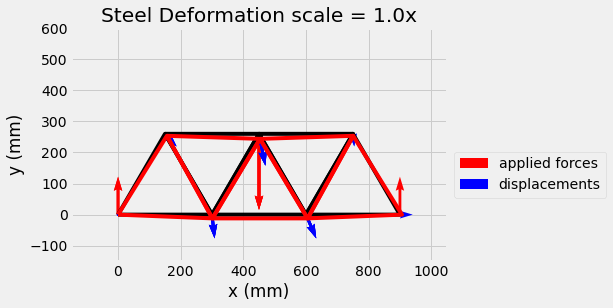

In [93]:
# 2d
ix = 2*np.block([[np.arange(0,5)],[np.arange(1,6)],[np.arange(2,7)],[np.arange(0,5)]])
iy = ix+1

r = np.block([n[1:3] for n in nodes])
r

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual

import ipywidgets as widgets

# def fst(s):
s=1
plt.plot(r[ix],r[iy],'-',color=(0,0,0,1))
plt.plot(r[ix]+ust[ix]*s,r[iy]+ust[iy]*s,'-',color=(1,0,0,1))
#plt.quiver(r[ix],r[iy],u[ix],u[iy],color=(0,0,1,1),label='displacements')
plt.quiver(r[ix],r[iy],forces[ix],forces[iy],color=(1,0,0,1),label='applied forces')
plt.quiver(r[ix],r[iy],ust[ix],ust[iy],color=(0,0,1,1),label='displacements')
plt.axis(l*np.array([-0.5,3.5,-0.5,2]))
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Steel Deformation scale = {:.1f}x'.format(s))
plt.legend(bbox_to_anchor=(1,0.5));
# interact(fst,s=(0,10,1));

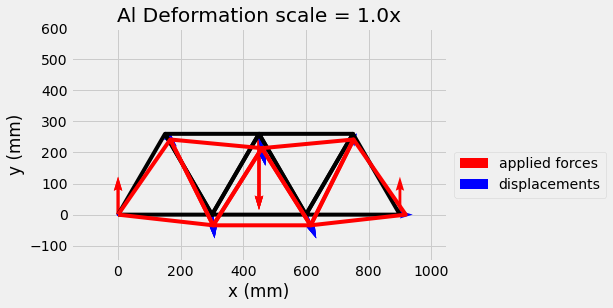

In [94]:
s=1
# def fal(s):
plt.plot(r[ix],r[iy],'-',color=(0,0,0,1))
plt.plot(r[ix]+ual[ix]*s,r[iy]+ual[iy]*s,'-',color=(1,0,0,1))
#plt.quiver(r[ix],r[iy],u[ix],u[iy],color=(0,0,1,1),label='displacements')
plt.quiver(r[ix],r[iy],forces[ix],forces[iy],color=(1,0,0,1),label='applied forces')
plt.quiver(r[ix],r[iy],ual[ix],ual[iy],color=(0,0,1,1),label='displacements')
plt.axis(l*np.array([-0.5,3.5,-0.5,2]))
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Al Deformation scale = {:.1f}x'.format(s))
plt.legend(bbox_to_anchor=(1,0.5));
# interact(fal,s=(0,10,1));

### 3. Determine cross-sectional area

a. Using aluminum, what is the minimum cross-sectional area to keep total y-deflections $<0.2~mm$?

b. Using steel, what is the minimum cross-sectional area to keep total y-deflections $<0.2~mm$?

c. What are the weights of the aluminum and steel trusses with the
chosen cross-sectional areas?

In [95]:
# 3a
testarea = np.arange(0.5,100,0.05)

ust_test=np.zeros(len(testarea))
for i in range(len(testarea)):
    ust_test = u/(Est*testarea[len(testarea)-1-i])
    if max(ust_test)<0.2:
        minsta = testarea[len(testarea)-1-i]

print('min steel cross section: {:1.2f}mm for def < 0.2mm'.format(minsta))

min steel cross section: 3.25mm for def < 0.2mm


In [96]:
ual_test=np.zeros(len(testarea))
for i in range(len(testarea)):
    ust_test = u/(Eal*testarea[len(testarea)-1-i])
    if max(ust_test)<0.2:
        minala = testarea[len(testarea)-1-i]

print('min Al cross section: {:1.2f}mm for def < 0.2mm'.format(minala))

min Al cross section: 9.30mm for def < 0.2mm


## References

1. <https://en.wikipedia.org/wiki/Direct_stiffness_method>